In [16]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info.states import Statevector, partial_trace
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline

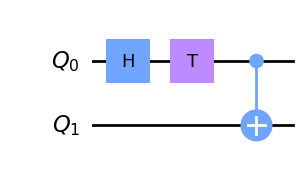

In [17]:
cq = QuantumRegister(2, "Q")
cr = QuantumCircuit(cq)

cr.h(0)
cr.t(0)
cr.cx(cq[0], cq[1])

cr.draw(output='mpl')

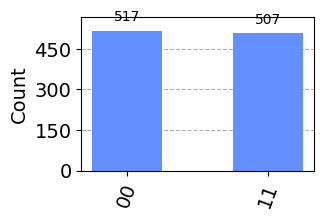

In [18]:
def measure_and_plot(circuit):
    circuit.measure_all()
    sim = Aer.get_backend('aer_simulator')
    job = execute(circuit, sim)
    result = job.result()
    counts = result.get_counts()
    return counts

plot_histogram(measure_and_plot(cr), figsize=(3,2))

Statevector([0.70710678+0.j , 0.        +0.j , 0.        +0.j ,
             0.5       +0.5j],
            dims=(2, 2))


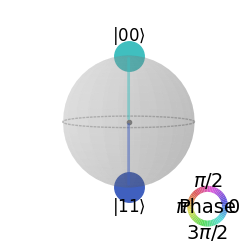

In [19]:
cq = QuantumRegister(2, "Q")
cr = QuantumCircuit(cq)

cr.h(0)
cr.t(0)
cr.cx(cq[0], cq[1])

cr.draw(output='mpl')

sim = Aer.get_backend('aer_simulator')
cr.save_statevector()   
qobj = assemble(cr)    
result = sim.run(qobj).result() 
out_state = result.get_statevector()
print(out_state) 

plot_state_qsphere(out_state, figsize=(3,3))